<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Financial Time Series

In [4]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn') #the style will set up the background color, grid color etc.
mpl.rcParams['font.family'] = 'serif' # running time parameters set up the font etc.
%matplotlib inline # this is a ipython magic function which suggests the plot will be embedded into the normal output rather than create the photo in a new area/framework.

## Financial Data

### Data Import

In [80]:
filename = '../../source/tr_eikon_eod_data.csv'  

In [111]:
with open(filename, 'r') as f:
    df= pd.read_csv(f, index_col = 0, parse_dates= True)

#df = pd.DataFrame(df)
print(type(df))
df.head(14)

<class 'pandas.core.frame.DataFrame'>


AAPL.O  MSFT.O  INTC.O   AMZN.O    GS.N     SPY     .SPX  \
Date                                                                      
2010-01-01        NaN     NaN     NaN      NaN     NaN     NaN      NaN   
2010-01-04  30.572827  30.950  20.880  133.900  173.08  113.33  1132.99   
2010-01-05  30.625684  30.960  20.870  134.690  176.14  113.63  1136.52   
2010-01-06  30.138541  30.770  20.800  132.250  174.26  113.71  1137.14   
2010-01-07  30.082827  30.452  20.600  130.000  177.67  114.19  1141.69   
2010-01-08  30.282827  30.660  20.830  133.520  174.31  114.57  1144.98   
2010-01-11  30.015684  30.270  20.950  130.308  171.56  114.73  1146.98   
2010-01-12  29.674256  30.070  20.608  127.350  167.82  113.66  1136.22   
2010-01-13  30.092827  30.350  20.960  129.110  169.07  114.62  1145.68   
2010-01-14  29.918542  30.960  21.480  127.350  168.53  114.93  1148.46   
2010-01-15  29.418542  30.860  20.800  127.140  165.21  113.64  1136.03   
2010-01-18        NaN     NaN     NaN      NaN     NaN     NaN      NaN   
2010-01-19  30.719969  31.100  21.050  127.610  166.86  115.06  1150.23   
2010-01-20  30.246398  30.585  21.080  125.780  167.79  113.89  1138.04   

             .VIX    EUR=     XAU=    GDX     GLD  
Date                                               
2010-01-01    NaN  1.4323  1096.35    NaN     NaN  
2010-01-04  20.04  1.4411  1120.00  47.71  109.80  
2010-01-05  19.35  1.4368  1118.65  48.17  109.70  
2010-01-06  19.16  1.4412  1138.50  49.34  111.51  
2010-01-07  19.06  1.4318  1131.90  49.10  110.82  
2010-01-08  18.13  1.4412  1136.10  49.84  111.37  
2010-01-11  17.55  1.4513  1152.60  50.17  112.85  
2010-01-12  18.25  1.4494  1127.30  48.35  110.49  
2010-01-13  17.85  1.4510  1138.40  48.86  111.54  
2010-01-14  17.63  1.4502  1142.85  48.60  112.03  
2010-01-15  17.91  1.4382  1129.90  47.42  110.86  
2010-01-18    NaN  1.4385  1132.50    NaN     NaN  
2010-01-19  17.58  1.4298  1137.70  47.69  111.52  
2010-01-20  18.68  1.4101  1111.30  45.73  108.94

In [196]:
len(df)

2216

In [112]:
f = open(filename, 'r')  
f.readlines()[:5]  

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-01,,,,,,,,,1.4323,1096.35,,\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n']

In [114]:
data = pd.read_csv(filename,  
                   index_col=0, 
                   parse_dates=True)  

In [115]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [142]:
data.head(12)  

AAPL.O  MSFT.O  INTC.O   AMZN.O    GS.N     SPY     .SPX  \
Date                                                                      
2010-01-01        NaN     NaN     NaN      NaN     NaN     NaN      NaN   
2010-01-04  30.572827  30.950  20.880  133.900  173.08  113.33  1132.99   
2010-01-05  30.625684  30.960  20.870  134.690  176.14  113.63  1136.52   
2010-01-06  30.138541  30.770  20.800  132.250  174.26  113.71  1137.14   
2010-01-07  30.082827  30.452  20.600  130.000  177.67  114.19  1141.69   
2010-01-08  30.282827  30.660  20.830  133.520  174.31  114.57  1144.98   
2010-01-11  30.015684  30.270  20.950  130.308  171.56  114.73  1146.98   
2010-01-12  29.674256  30.070  20.608  127.350  167.82  113.66  1136.22   
2010-01-13  30.092827  30.350  20.960  129.110  169.07  114.62  1145.68   
2010-01-14  29.918542  30.960  21.480  127.350  168.53  114.93  1148.46   
2010-01-15  29.418542  30.860  20.800  127.140  165.21  113.64  1136.03   
2010-01-18        NaN     NaN     NaN      NaN     NaN     NaN      NaN   

             .VIX    EUR=     XAU=    GDX     GLD  
Date                                               
2010-01-01    NaN  1.4323  1096.35    NaN     NaN  
2010-01-04  20.04  1.4411  1120.00  47.71  109.80  
2010-01-05  19.35  1.4368  1118.65  48.17  109.70  
2010-01-06  19.16  1.4412  1138.50  49.34  111.51  
2010-01-07  19.06  1.4318  1131.90  49.10  110.82  
2010-01-08  18.13  1.4412  1136.10  49.84  111.37  
2010-01-11  17.55  1.4513  1152.60  50.17  112.85  
2010-01-12  18.25  1.4494  1127.30  48.35  110.49  
2010-01-13  17.85  1.4510  1138.40  48.86  111.54  
2010-01-14  17.63  1.4502  1142.85  48.60  112.03  
2010-01-15  17.91  1.4382  1129.90  47.42  110.86  
2010-01-18    NaN  1.4385  1132.50    NaN     NaN

In [117]:
data.tail()  

AAPL.O  MSFT.O  INTC.O   AMZN.O    GS.N     SPY     .SPX   .VIX  \
Date                                                                          
2018-06-25  182.17   98.39   50.71  1663.15  221.54  271.00  2717.07  17.33   
2018-06-26  184.43   99.08   49.67  1691.09  221.58  271.60  2723.06  15.92   
2018-06-27  184.16   97.54   48.76  1660.51  220.18  269.35  2699.63  17.91   
2018-06-28  185.50   98.63   49.25  1701.45  223.42  270.89  2716.31  16.85   
2018-06-29  185.11   98.61   49.71  1699.80  220.57  271.28  2718.37  16.09   

              EUR=     XAU=    GDX     GLD  
Date                                        
2018-06-25  1.1702  1265.00  22.01  119.89  
2018-06-26  1.1645  1258.64  21.95  119.26  
2018-06-27  1.1552  1251.62  21.81  118.58  
2018-06-28  1.1567  1247.88  21.93  118.22  
2018-06-29  1.1683  1252.25  22.31  118.65

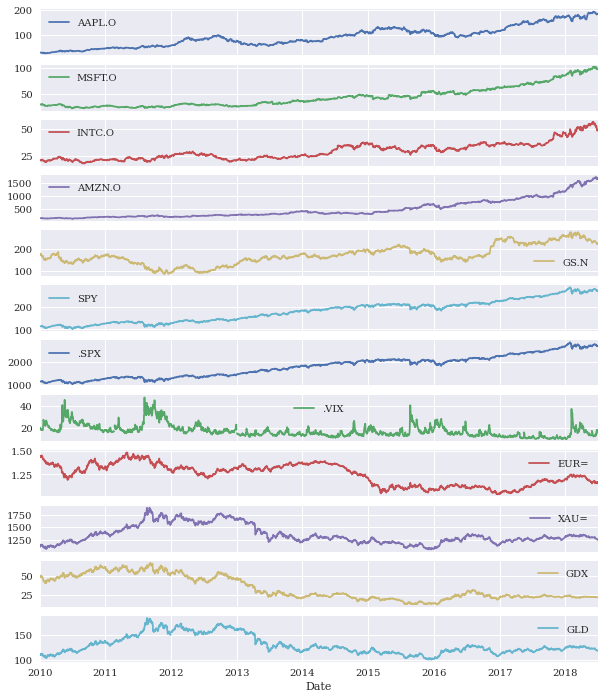

In [119]:
data.plot(figsize=(10, 12), subplots=True);  
# plt.savefig('../../images/ch08/fts_01.png');

In [120]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

In [121]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


### Summary Statistics

In [122]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [123]:
data.describe().round(2)  

AAPL.O   MSFT.O   INTC.O   AMZN.O     GS.N      SPY     .SPX     .VIX  \
count  2138.00  2138.00  2138.00  2138.00  2138.00  2138.00  2138.00  2138.00   
mean     93.46    44.56    29.36   480.46   170.22   180.32  1802.71    17.03   
std      40.55    19.53     8.17   372.31    42.48    48.19   483.34     5.88   
min      27.44    23.01    17.66   108.61    87.70   102.20  1022.58     9.14   
25%      60.29    28.57    22.51   213.60   146.61   133.99  1338.57    13.07   
50%      90.55    39.66    27.33   322.06   164.43   186.32  1863.08    15.58   
75%     117.24    54.37    34.71   698.85   192.13   210.99  2108.94    19.07   
max     193.98   102.49    57.08  1750.08   273.38   286.58  2872.87    48.00   

          EUR=     XAU=      GDX      GLD  
count  2216.00  2211.00  2138.00  2138.00  
mean      1.25  1349.01    33.57   130.09  
std       0.11   188.75    15.17    18.78  
min       1.04  1051.36    12.47   100.50  
25%       1.13  1221.53    22.14   117.40  
50%       1.27  1292.61    25.62   124.00  
75%       1.35  1428.24    48.34   139.00  
max       1.48  1898.99    66.63   184.59

In [124]:
data.mean()  

AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

In [125]:
data.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

AAPL.O  MSFT.O  INTC.O   AMZN.O    GS.N     SPY     .SPX   .VIX  EUR=  \
min      27.44   23.01   17.66   108.61   87.70  102.20  1022.58   9.14  1.04   
mean     93.46   44.56   29.36   480.46  170.22  180.32  1802.71  17.03  1.25   
std      40.55   19.53    8.17   372.31   42.48   48.19   483.34   5.88  0.11   
median   90.55   39.66   27.33   322.06  164.43  186.32  1863.08  15.58  1.27   
max     193.98  102.49   57.08  1750.08  273.38  286.58  2872.87  48.00  1.48   

           XAU=    GDX     GLD  
min     1051.36  12.47  100.50  
mean    1349.01  33.57  130.09  
std      188.75  15.17   18.78  
median  1292.61  25.62  124.00  
max     1898.99  66.63  184.59

### Changes Over Time

In [126]:
data.diff().head()  

AAPL.O  MSFT.O  INTC.O  AMZN.O  GS.N   SPY  .SPX  .VIX    EUR=  \
Date                                                                           
2010-01-01       NaN     NaN     NaN     NaN   NaN   NaN   NaN   NaN     NaN   
2010-01-04       NaN     NaN     NaN     NaN   NaN   NaN   NaN   NaN  0.0088   
2010-01-05  0.052857   0.010   -0.01    0.79  3.06  0.30  3.53 -0.69 -0.0043   
2010-01-06 -0.487142  -0.190   -0.07   -2.44 -1.88  0.08  0.62 -0.19  0.0044   
2010-01-07 -0.055714  -0.318   -0.20   -2.25  3.41  0.48  4.55 -0.10 -0.0094   

             XAU=   GDX   GLD  
Date                           
2010-01-01    NaN   NaN   NaN  
2010-01-04  23.65   NaN   NaN  
2010-01-05  -1.35  0.46 -0.10  
2010-01-06  19.85  1.17  1.81  
2010-01-07  -6.60 -0.24 -0.69

In [127]:
data.diff().mean()  

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

In [128]:
data.pct_change().round(3).head()  

AAPL.O  MSFT.O  INTC.O  AMZN.O   GS.N    SPY   .SPX   .VIX   EUR=  \
Date                                                                            
2010-01-01     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-04     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN  0.006   
2010-01-05   0.002   0.000  -0.000   0.006  0.018  0.003  0.003 -0.034 -0.003   
2010-01-06  -0.016  -0.006  -0.003  -0.018 -0.011  0.001  0.001 -0.010  0.003   
2010-01-07  -0.002  -0.010  -0.010  -0.017  0.020  0.004  0.004 -0.005 -0.007   

             XAU=    GDX    GLD  
Date                             
2010-01-01    NaN    NaN    NaN  
2010-01-04  0.022    NaN    NaN  
2010-01-05 -0.001  0.010 -0.001  
2010-01-06  0.018  0.024  0.016  
2010-01-07 -0.006 -0.005 -0.006

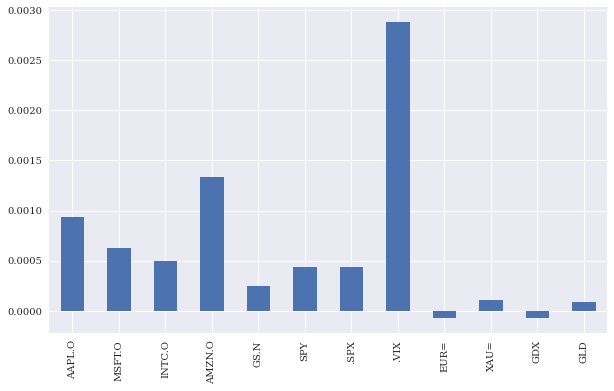

In [137]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_02.png');

In [139]:
rets = np.log(data / data.shift(1)) 
rets.head(10)

AAPL.O    MSFT.O    INTC.O    AMZN.O      GS.N       SPY  \
Date                                                                     
2010-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-05  0.001727  0.000323 -0.000479  0.005883  0.017525  0.002644   
2010-01-06 -0.016034 -0.006156 -0.003360 -0.018282 -0.010731  0.000704   
2010-01-07 -0.001850 -0.010389 -0.009662 -0.017160  0.019379  0.004212   
2010-01-08  0.006626  0.006807  0.011103  0.026717 -0.019093  0.003322   
2010-01-11 -0.008861 -0.012802  0.005744 -0.024350 -0.015902  0.001396   
2010-01-12 -0.011440 -0.006629 -0.016459 -0.022962 -0.022041 -0.009370   
2010-01-13  0.014007  0.009269  0.016937  0.013726  0.007421  0.008411   
2010-01-14 -0.005808  0.019900  0.024506 -0.013726 -0.003199  0.002701   

                .SPX      .VIX      EUR=      XAU=       GDX       GLD  
Date                                                                    
2010-01-01       NaN       NaN       NaN       NaN       NaN       NaN  
2010-01-04       NaN       NaN  0.006125  0.021342       NaN       NaN  
2010-01-05  0.003111 -0.035038 -0.002988 -0.001206  0.009595 -0.000911  
2010-01-06  0.000545 -0.009868  0.003058  0.017589  0.023999  0.016365  
2010-01-07  0.003993 -0.005233 -0.006544 -0.005814 -0.004876 -0.006207  
2010-01-08  0.002878 -0.050024  0.006544  0.003704  0.014959  0.004951  
2010-01-11  0.001745 -0.032514  0.006984  0.014419  0.006599  0.013202  
2010-01-12 -0.009425  0.039111 -0.001310 -0.022195 -0.036951 -0.021134  
2010-01-13  0.008291 -0.022162  0.001103  0.009798  0.010493  0.009458  
2010-01-14  0.002424 -0.012402 -0.000551  0.003901 -0.005336  0.004383

In [140]:
rets.head().round(3)  

AAPL.O  MSFT.O  INTC.O  AMZN.O   GS.N    SPY   .SPX   .VIX   EUR=  \
Date                                                                            
2010-01-01     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-04     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN  0.006   
2010-01-05   0.002   0.000  -0.000   0.006  0.018  0.003  0.003 -0.035 -0.003   
2010-01-06  -0.016  -0.006  -0.003  -0.018 -0.011  0.001  0.001 -0.010  0.003   
2010-01-07  -0.002  -0.010  -0.010  -0.017  0.019  0.004  0.004 -0.005 -0.007   

             XAU=    GDX    GLD  
Date                             
2010-01-01    NaN    NaN    NaN  
2010-01-04  0.021    NaN    NaN  
2010-01-05 -0.001  0.010 -0.001  
2010-01-06  0.018  0.024  0.016  
2010-01-07 -0.006 -0.005 -0.006

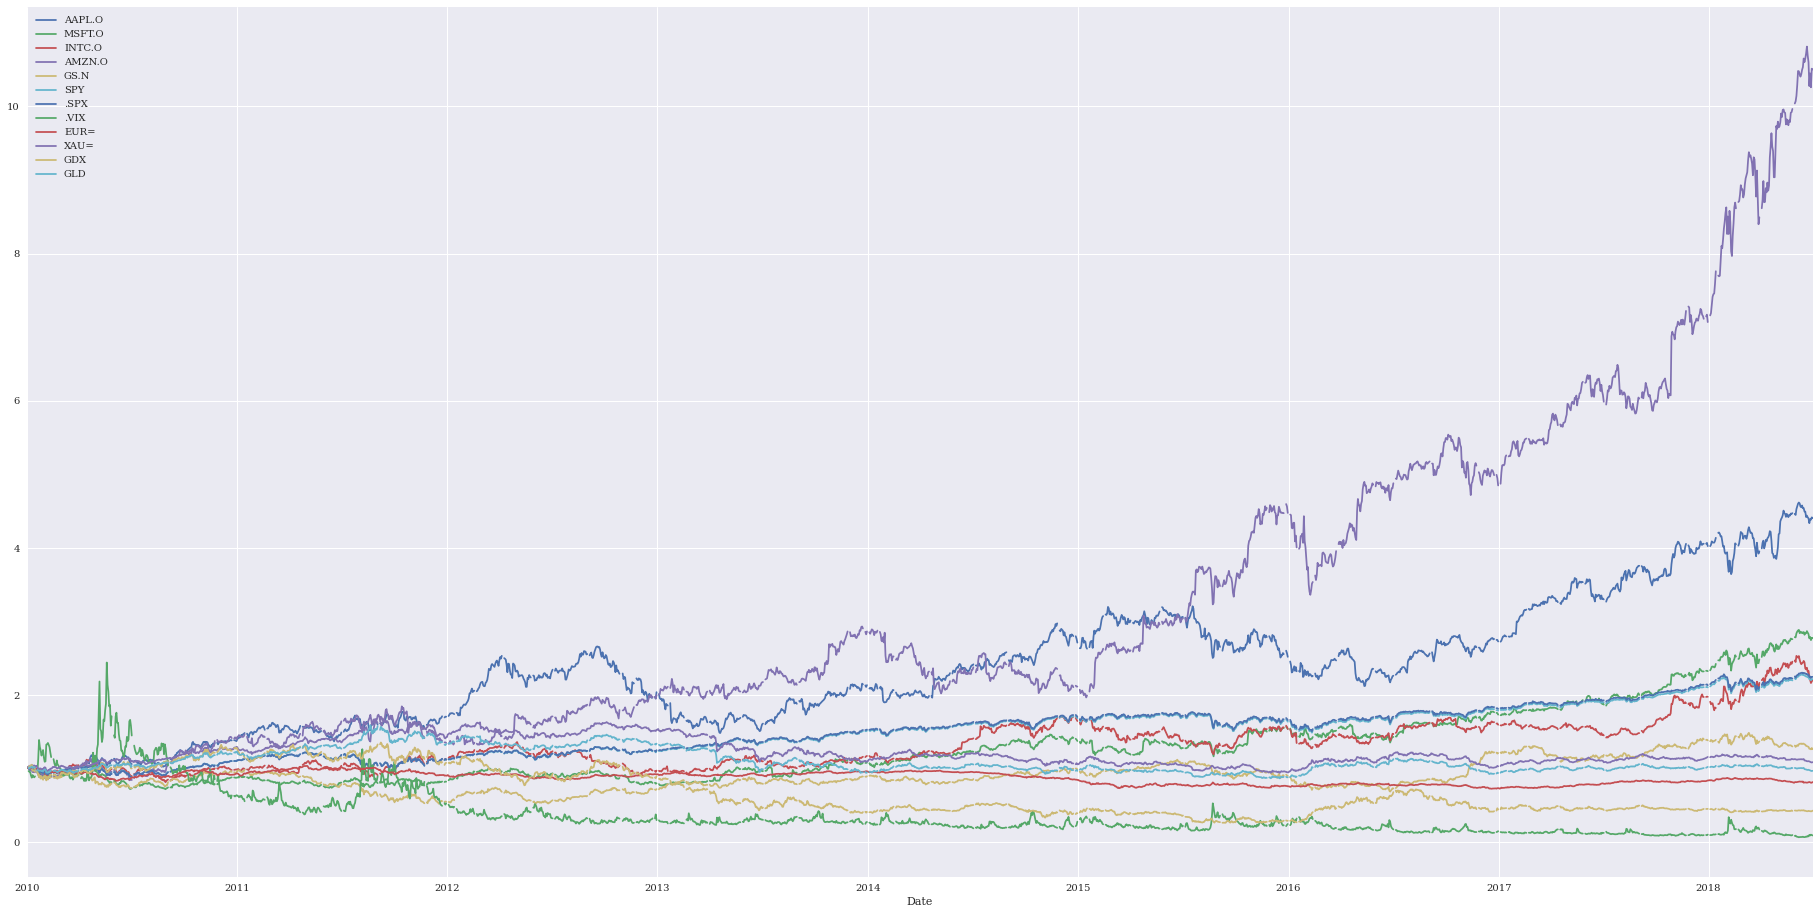

In [141]:
rets.cumsum().apply(np.exp).plot(figsize=(32, 16));  
# plt.savefig('../../images/ch08/fts_03.png');

### Resampling

In [144]:
data.resample('1w', label='left').last().head()  #resample to one week interval (this requires the data is date indexed)
#label indicates the edge of the bins used to resample.

AAPL.O  MSFT.O  INTC.O  AMZN.O    GS.N     SPY     .SPX   .VIX  \
Date                                                                            
2009-12-27        NaN     NaN     NaN     NaN     NaN     NaN      NaN    NaN   
2010-01-03  30.282827   30.66   20.83  133.52  174.31  114.57  1144.98  18.13   
2010-01-10  29.418542   30.86   20.80  127.14  165.21  113.64  1136.03  17.91   
2010-01-17  28.249972   28.96   19.91  121.43  154.12  109.21  1091.76  27.31   
2010-01-24  27.437544   28.18   19.40  125.41  148.72  107.39  1073.87  24.62   

              EUR=     XAU=    GDX     GLD  
Date                                        
2009-12-27  1.4323  1096.35    NaN     NaN  
2010-01-03  1.4412  1136.10  49.84  111.37  
2010-01-10  1.4382  1129.90  47.42  110.86  
2010-01-17  1.4137  1092.60  43.79  107.17  
2010-01-24  1.3862  1081.05  40.72  105.96

In [25]:
data.resample('1m', label='right').last().head()  

AAPL.O   MSFT.O  INTC.O  AMZN.O    GS.N       SPY     .SPX  \
Date                                                                        
2010-01-31  27.437544  28.1800   19.40  125.41  148.72  107.3900  1073.87   
2010-02-28  29.231399  28.6700   20.53  118.40  156.35  110.7400  1104.49   
2010-03-31  33.571395  29.2875   22.29  135.77  170.63  117.0000  1169.43   
2010-04-30  37.298534  30.5350   22.84  137.10  145.20  118.8125  1186.69   
2010-05-31  36.697106  25.8000   21.42  125.46  144.26  109.3690  1089.41   

             .VIX    EUR=     XAU=    GDX      GLD  
Date                                                
2010-01-31  24.62  1.3862  1081.05  40.72  105.960  
2010-02-28  19.50  1.3625  1116.10  43.89  109.430  
2010-03-31  17.59  1.3510  1112.80  44.41  108.950  
2010-04-30  22.05  1.3295  1178.25  50.51  115.360  
2010-05-31  32.07  1.2305  1215.71  49.86  118.881

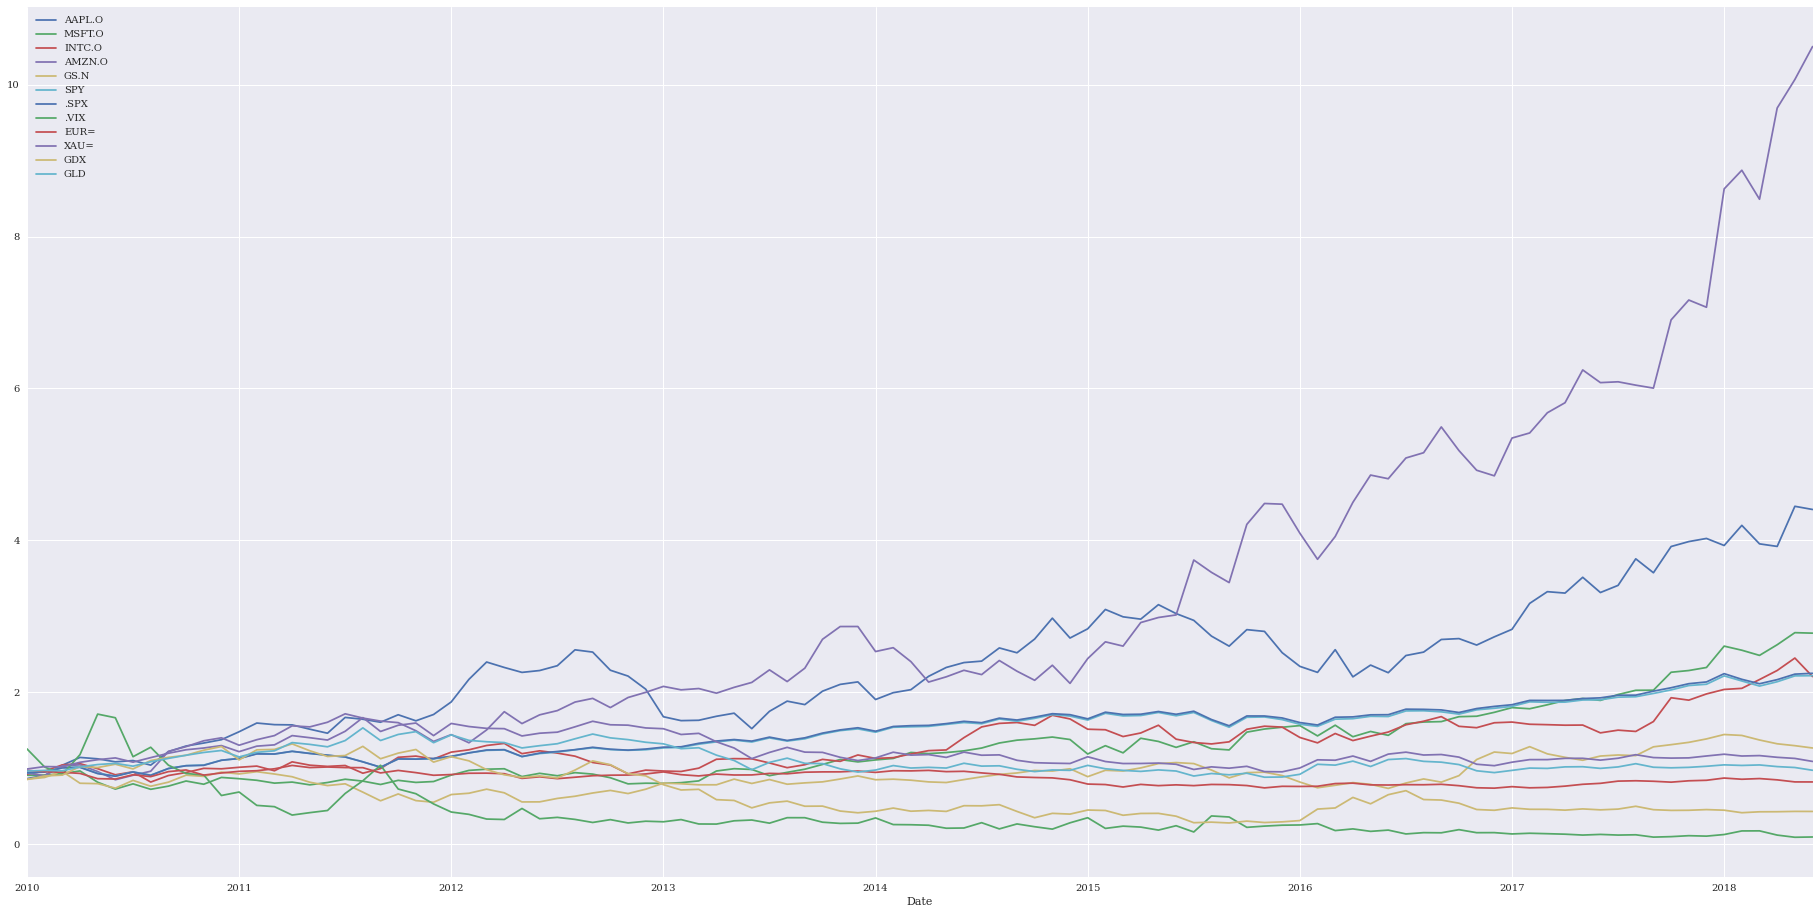

In [146]:
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(32, 16));  
# plt.savefig('../../images/ch08/fts_04.png');

## Rolling Statistics

In [147]:
sym = 'AAPL.O'

In [148]:
data = pd.DataFrame(data[sym]).dropna()

In [155]:
data.head(10)

AAPL.O        min
Date                            
2010-01-04  30.572827        NaN
2010-01-05  30.625684        NaN
2010-01-06  30.138541        NaN
2010-01-07  30.082827  30.082827
2010-01-08  30.282827  30.082827
2010-01-11  30.015684  30.015684
2010-01-12  29.674256  29.674256
2010-01-13  30.092827  29.674256
2010-01-14  29.918542  29.674256
2010-01-15  29.418542  29.418542

### An Overview

In [153]:
window = 4  

In [156]:
data['min'] = data[sym].rolling(window=window).min()  
data['min'].head(10)

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07    30.082827
2010-01-08    30.082827
2010-01-11    30.015684
2010-01-12    29.674256
2010-01-13    29.674256
2010-01-14    29.674256
2010-01-15    29.418542
Name: min, dtype: float64

In [157]:
data['mean'] = data[sym].rolling(window=window).mean()  

In [158]:
data['std'] = data[sym].rolling(window=window).std()  

In [159]:
data['median'] = data[sym].rolling(window=window).median()  

In [160]:
data['max'] = data[sym].rolling(window=window).max()  

In [161]:
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()  

In [177]:
#data.dropna().head()


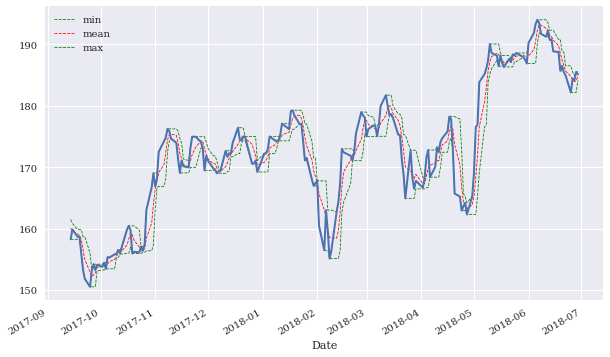

In [194]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)  ;
data[sym].iloc[-200:].plot( lw=2.0);
# plt.savefig('../../images/ch08/fts_05.png');

### A Technical Analysis Example

In [195]:
data['SMA1'] = data[sym].rolling(window=42).mean()  

In [227]:
data1 = pd.DataFrame({'x': [i for i in range(2216)]})

data1

data1['xx'] = data1['x'].rolling(window=2).mean()

data1


x      xx
0        0     NaN
1        1     0.5
2        2     1.5
3        3     2.5
4        4     3.5
...    ...     ...
2211  2211  2210.5
2212  2212  2211.5
2213  2213  2212.5
2214  2214  2213.5
2215  2215  2214.5

[2216 rows x 2 columns]

In [228]:
data['SMA2'] = data[sym].rolling(window=252).mean()  

In [229]:
data[[sym, 'SMA1', 'SMA2']].tail()

AAPL.O        SMA1        SMA2
Date                                      
2018-06-25  182.17  185.606190  168.265556
2018-06-26  184.43  186.087381  168.418770
2018-06-27  184.16  186.607381  168.579206
2018-06-28  185.50  187.089286  168.736627
2018-06-29  185.11  187.470476  168.901032

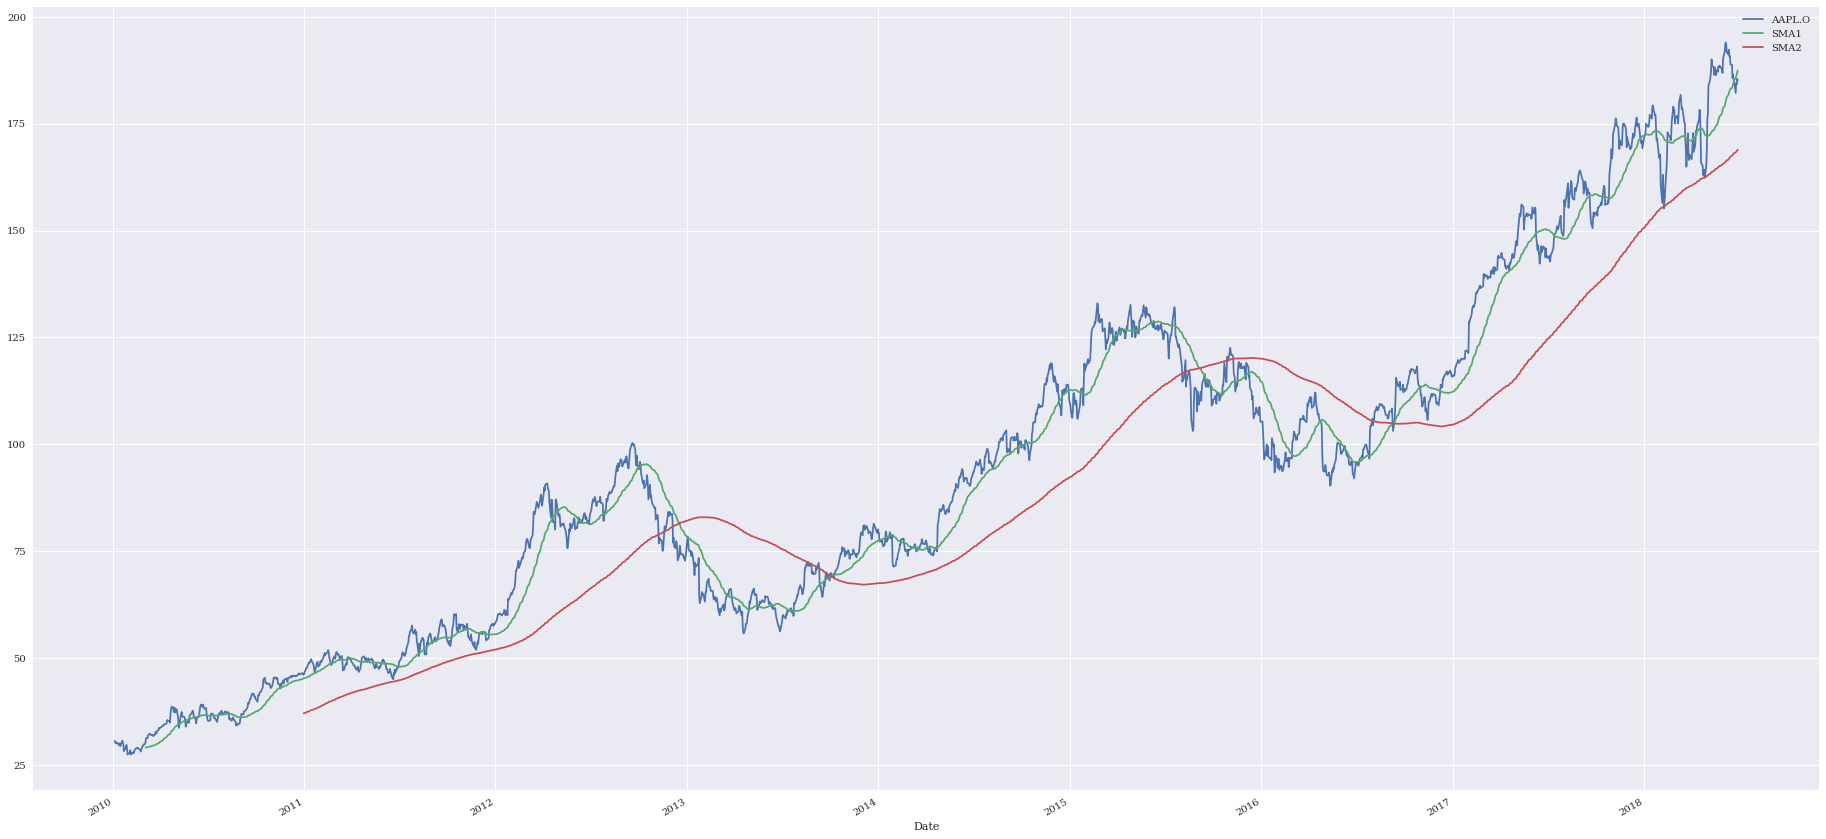

In [230]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(32, 16));  
# plt.savefig('../../images/ch08/fts_06.png');

In [45]:
data.dropna(inplace=True)  

In [231]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'],  1,  
                             -1)  #if the condition is met, put a value of '1', and '-1' otherwise.

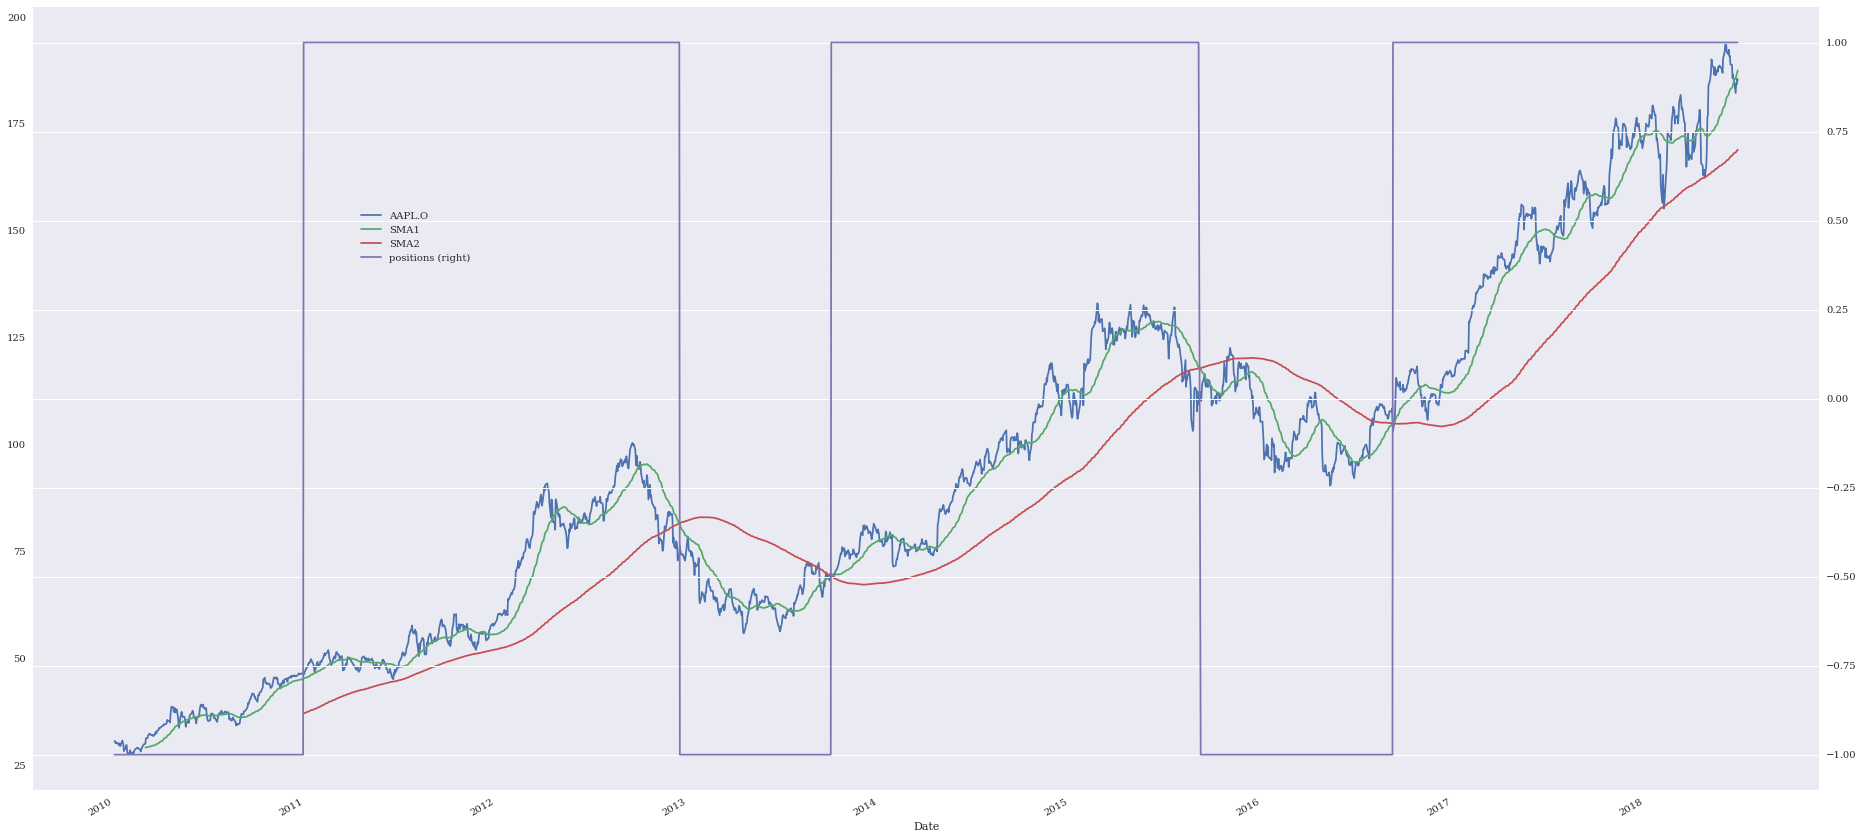

In [240]:
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(32, 16),
                                              secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.75));
# plt.savefig('../../images/ch08/fts_07.png');

## Regression Analysis

### The Data

In [244]:
# EOD data from Thomson Reuters Eikon Data API
raw = pd.read_csv('../../source/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [246]:
data = raw[['.SPX', '.VIX']].dropna()

In [247]:
data.tail()

.SPX   .VIX
Date                      
2018-06-25  2717.07  17.33
2018-06-26  2723.06  15.92
2018-06-27  2699.63  17.91
2018-06-28  2716.31  16.85
2018-06-29  2718.37  16.09

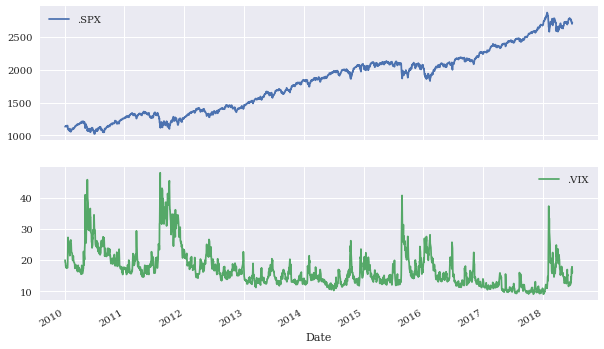

In [248]:
data.plot(subplots=True, figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_08.png');

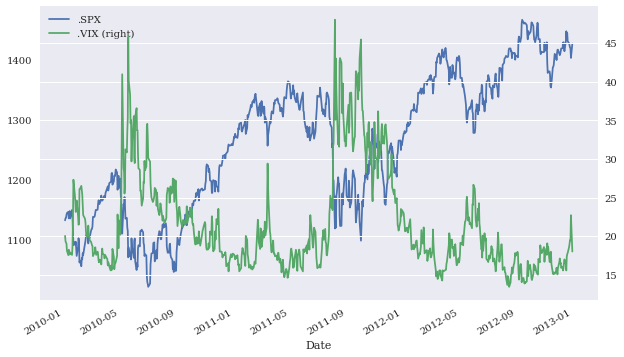

In [249]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_09.png');

### Log Returns

In [253]:
data.head(4)

.SPX   .VIX
Date                      
2010-01-04  1132.99  20.04
2010-01-05  1136.52  19.35
2010-01-06  1137.14  19.16
2010-01-07  1141.69  19.06

In [258]:
data["temp"] = data[".VIX"].shift(1)
data.head(4)

.SPX   .VIX   temp
Date                             
2010-01-04  1132.99  20.04    NaN
2010-01-05  1136.52  19.35  20.04
2010-01-06  1137.14  19.16  19.35
2010-01-07  1141.69  19.06  19.16

In [260]:



rets = np.log(data / data.shift(1)) #this is the log return, the np.log applies the calculation across all element of the dataset.

In [261]:
rets.head()

.SPX      .VIX      temp
Date                                    
2010-01-04       NaN       NaN       NaN
2010-01-05  0.003111 -0.035038       NaN
2010-01-06  0.000545 -0.009868 -0.035038
2010-01-07  0.003993 -0.005233 -0.009868
2010-01-08  0.002878 -0.050024 -0.005233

In [262]:
rets.dropna(inplace=True)
print(rets)

                .SPX      .VIX      temp
Date                                    
2010-01-06  0.000545 -0.009868 -0.035038
2010-01-07  0.003993 -0.005233 -0.009868
2010-01-08  0.002878 -0.050024 -0.005233
2010-01-11  0.001745 -0.032514 -0.050024
2010-01-12 -0.009425  0.039111 -0.032514
...              ...       ...       ...
2018-06-25 -0.013820  0.229947 -0.061265
2018-06-26  0.002202 -0.084863  0.229947
2018-06-27 -0.008642  0.117783 -0.084863
2018-06-28  0.006160 -0.061009  0.117783
2018-06-29  0.000758 -0.046153 -0.061009

[2136 rows x 3 columns]


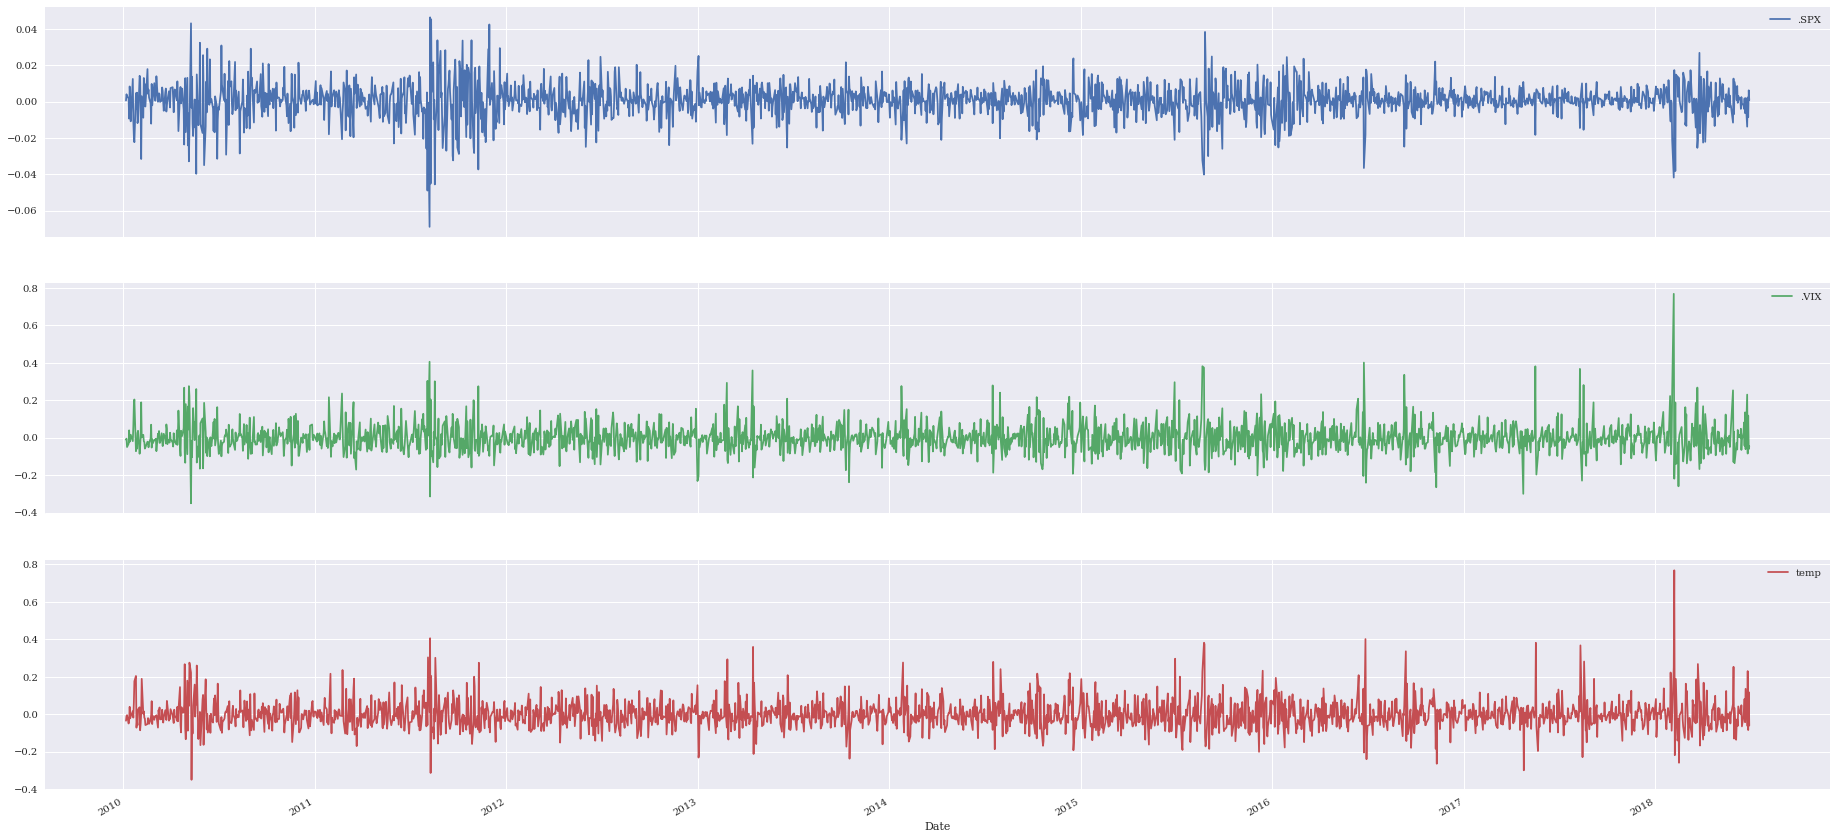

In [263]:
rets.plot(subplots=True, figsize=(32, 16));
# plt.savefig('../../images/ch08/fts_10.png');

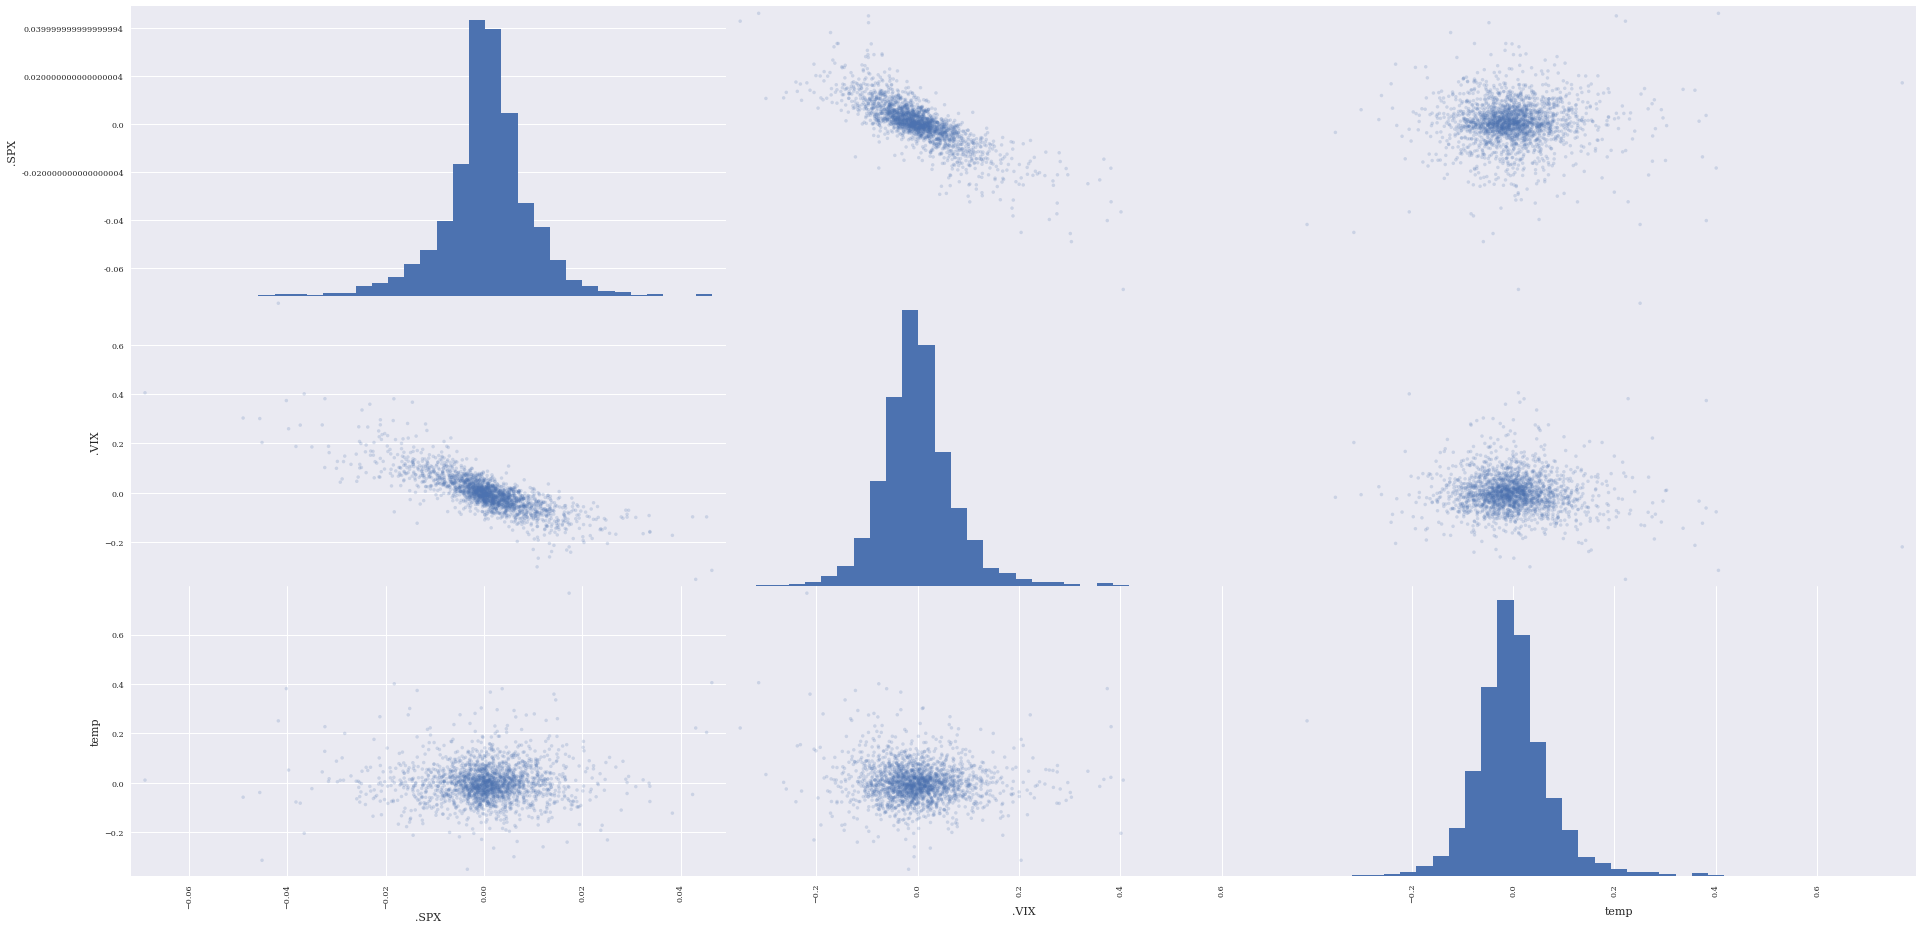

In [264]:
pd.plotting.scatter_matrix(rets,  
                           alpha=0.2,  
                           diagonal='hist',  
                           hist_kwds={'bins': 35},  
                           figsize=(32, 16));
# plt.savefig('../../images/ch08/fts_11.png');

### OLS Regression

In [68]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)  

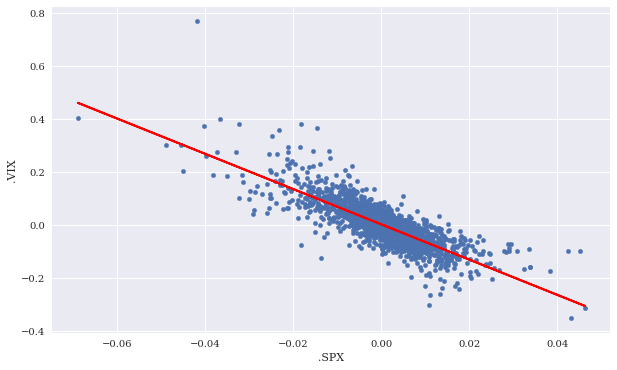

In [55]:
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(32, 16))  
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);  
# plt.savefig('../../images/ch08/fts_12.png');

In [276]:
rets[['.SPX','.VIX']].corr()

.SPX      .VIX
.SPX  1.000000 -0.804375
.VIX -0.804375  1.000000

In [278]:
rets.iloc[:,[0,1]].corr()

.SPX      .VIX
.SPX  1.000000 -0.804375
.VIX -0.804375  1.000000

### Correlation

In [271]:
rets.corr()

.SPX      .VIX      temp
.SPX  1.000000 -0.804375  0.025798
.VIX -0.804375  1.000000 -0.065139
temp  0.025798 -0.065139  1.000000

Date
2018-06-18   -0.804374
2018-06-19   -0.806155
2018-06-20   -0.806019
2018-06-21   -0.806613
2018-06-22   -0.806607
2018-06-25   -0.809541
2018-06-26   -0.808976
2018-06-27   -0.809099
2018-06-28   -0.808614
2018-06-29   -0.807146
dtype: float64


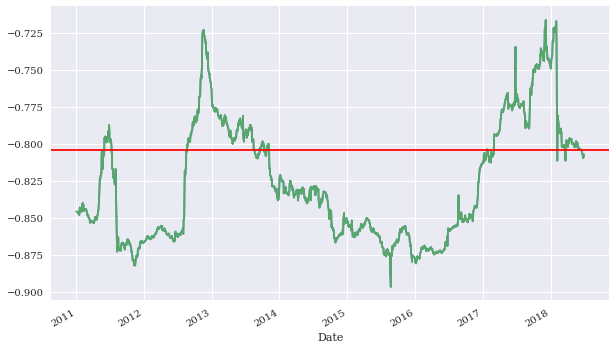

In [296]:
cor1= rets['.SPX'].rolling(window= 252).corr(rets['.VIX'])
cor1.plot(figsize = (10,6))
print(cor1.tail(10))
cor1.plot().axhline(rets.corr().iloc[0, 1], c='r');  


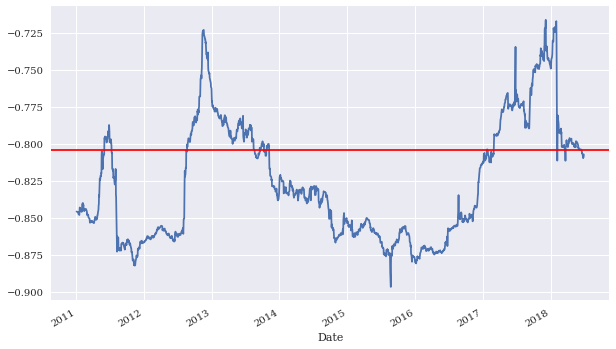

In [291]:
ax = rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(figsize=(10, 6))  
ax.axhline(rets.corr().iloc[0, 1], c='r');  
# plt.savefig('../../images/ch08/fts_13.png');

## High Frequency Data

In [58]:
# from fxcmpy import fxcmpy_tick_data_reader as tdr
# data = tdr('EURUSD', start='2018-6-25', end='2018-06-30')
# data.get_data(start='2018-6-29',
#               end='2018-06-30').to_csv('../../source/fxcm_eur_usd_tick_data.csv')

In [297]:
%%time
# data from FXCM Forex Capital Markets Ltd.
tick = pd.read_csv('../../source/fxcm_eur_usd_tick_data.csv',
                     index_col=0, parse_dates=True)

CPU times: user 374 ms, sys: 38.7 ms, total: 412 ms
Wall time: 413 ms


In [298]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Bid     461357 non-null  float64
 1   Ask     461357 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


In [299]:
tick.head()

Bid      Ask
2018-06-29 00:00:00.082  1.15635  1.15636
2018-06-29 00:00:00.106  1.15634  1.15636
2018-06-29 00:00:00.114  1.15634  1.15635
2018-06-29 00:00:00.121  1.15634  1.15634
2018-06-29 00:00:00.151  1.15632  1.15634

In [305]:
tick['Mid'] = tick.mean(axis=1)  
tick.head()

Bid      Ask       Mid
2018-06-29 00:00:00.082  1.15635  1.15636  1.156355
2018-06-29 00:00:00.106  1.15634  1.15636  1.156350
2018-06-29 00:00:00.114  1.15634  1.15635  1.156345
2018-06-29 00:00:00.121  1.15634  1.15634  1.156340
2018-06-29 00:00:00.151  1.15632  1.15634  1.156330

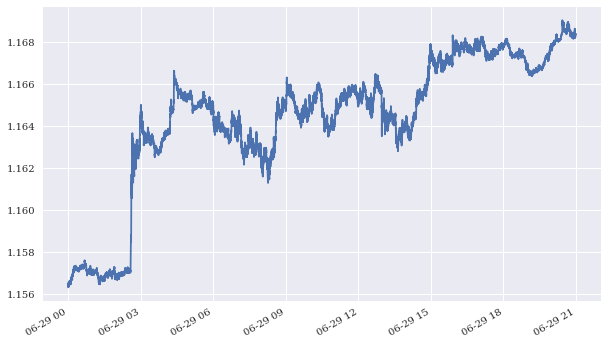

In [302]:
tick['Mid'].plot(figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_14.png');

In [306]:
tick_resam = tick.resample(rule='5min', label='right').last()

In [307]:
tick_resam.head()

Bid      Ask       Mid
2018-06-29 00:05:00  1.15649  1.15651  1.156500
2018-06-29 00:10:00  1.15671  1.15672  1.156715
2018-06-29 00:15:00  1.15725  1.15727  1.157260
2018-06-29 00:20:00  1.15720  1.15722  1.157210
2018-06-29 00:25:00  1.15711  1.15712  1.157115

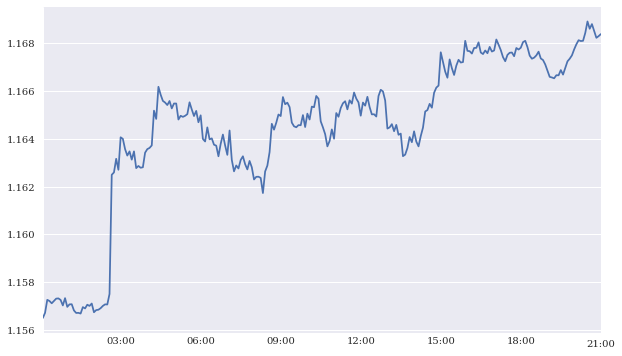

In [308]:
tick_resam['Mid'].plot(figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_15.png');

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>